<a href="https://colab.research.google.com/github/pschwartz222/MA-576/blob/main/Least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy.linalg import eig
from numpy import linalg as LA
from numpy import random
from numpy.random import normal
import matplotlib.pyplot as plt
from matplotlib.pyplot import colormaps
from sympy import diff, symbols
from sympy import cos, sin
import seaborn as sns
import scipy.stats as ss

In [2]:
A = np.array([[1,2], [2,1], [3,2]])
b = np.array([[0], [1], [1]])
print('A =')
print(A)
print('b =')
print(b)

A =
[[1 2]
 [2 1]
 [3 2]]
b =
[[0]
 [1]
 [1]]


In [3]:
print(A.T @ b)

[[5]
 [3]]


Minimize ||Ax-b||^2.

In [4]:
def Least_squares(A, b): #input a (m x n) matrix A with m>=n and rank(A)=n, and a (m x 1) col b
  Q = A.T @ A
  b_prime = A.T @ b
  x_LS = LA.inv(Q) @ b_prime
  return(x_LS)

In [5]:
x=Least_squares(A,b)

print('Least squares solution =')
print(x)
print()

y = A @ x - b

print('Ax-b=')
print(y)
print()

dist = LA.norm(y) #calculates the sum of the components squared

print('||Ax-b||^2 =')
print(f"{dist**2: .4f}")

Least squares solution =
[[ 0.57692308]
 [-0.30769231]]

Ax-b=
[[-0.03846154]
 [-0.15384615]
 [ 0.11538462]]

||Ax-b||^2 =
 0.0385


Now let's plot some data and fit a line to it using least-squares

In [6]:
m = 100
err = normal(size=m)

u = np.linspace(1,5,m)
v = 10 + 2*u + err

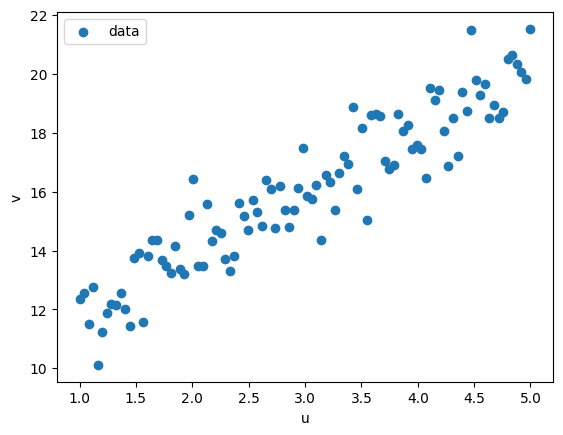

In [7]:
plt.scatter(u,v, label='data')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.show()

In [8]:
vec = np.ones((m,1))
u_T = u.T
vec = np.ones((m,1))
U = np.ones((m,2))
U[:,1] = u_T #insert the u-coordinates into the second column of U

xls = Least_squares(U, v.T) #find the least squares solution to U(beta) = v

In [9]:
print(xls)

[9.74981402 2.09267275]


In [10]:
beta_0=xls[0]
beta_1=xls[1]

In [11]:
lin = beta_0 + beta_1*u

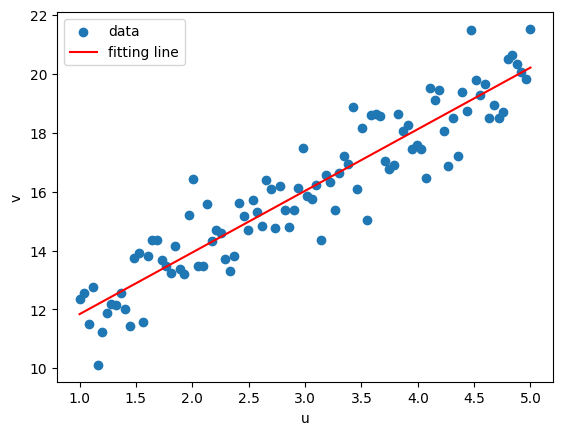

In [12]:
plt.scatter(u,v, label='data')
plt.plot(u,lin, label='fitting line', color='red')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.show()

In [ ]:
v_1 = beta_0 + beta_1*u + 2*u**2+err

What happens if the data does not have a linear shape?

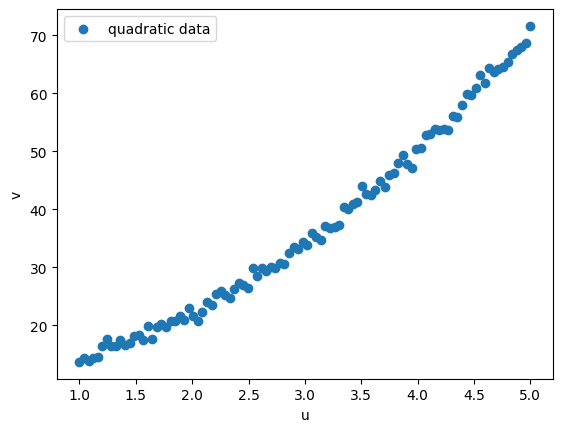

In [ ]:
plt.scatter(u,v_1, label='quadratic data')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.show()

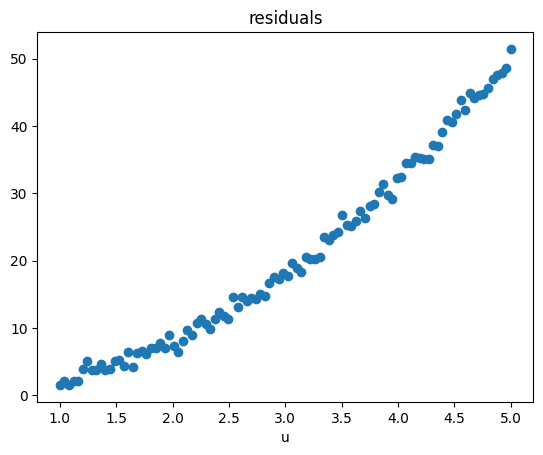

In [ ]:
diff = v_1 - lin
plt.scatter(u,diff)
plt.xlabel('u')
plt.title('residuals')
plt.show()

These residuals are too high

Instead let's find a quadratic curve to fit the data.

In [ ]:
U_1 = np.ones((m,3))
U_1[:,1] = u_T
U_1[:,2] = u_T**2
print(U_1)

[[ 1.          1.          1.        ]
 [ 1.          1.04040404  1.08244057]
 [ 1.          1.08080808  1.16814611]
 [ 1.          1.12121212  1.25711662]
 [ 1.          1.16161616  1.34935211]
 [ 1.          1.2020202   1.44485257]
 [ 1.          1.24242424  1.543618  ]
 [ 1.          1.28282828  1.6456484 ]
 [ 1.          1.32323232  1.75094378]
 [ 1.          1.36363636  1.85950413]
 [ 1.          1.4040404   1.97132946]
 [ 1.          1.44444444  2.08641975]
 [ 1.          1.48484848  2.20477502]
 [ 1.          1.52525253  2.32639527]
 [ 1.          1.56565657  2.45128048]
 [ 1.          1.60606061  2.57943067]
 [ 1.          1.64646465  2.71084583]
 [ 1.          1.68686869  2.84552597]
 [ 1.          1.72727273  2.98347107]
 [ 1.          1.76767677  3.12468115]
 [ 1.          1.80808081  3.26915621]
 [ 1.          1.84848485  3.41689624]
 [ 1.          1.88888889  3.56790123]
 [ 1.          1.92929293  3.72217121]
 [ 1.          1.96969697  3.87970615]
 [ 1.          2.01010101

In [ ]:
xls_quad = Least_squares(U_1,v_1)
[a_0, a_1, a_2] = xls_quad
quad_approx = a_0 + a_1*u+a_2*u**2

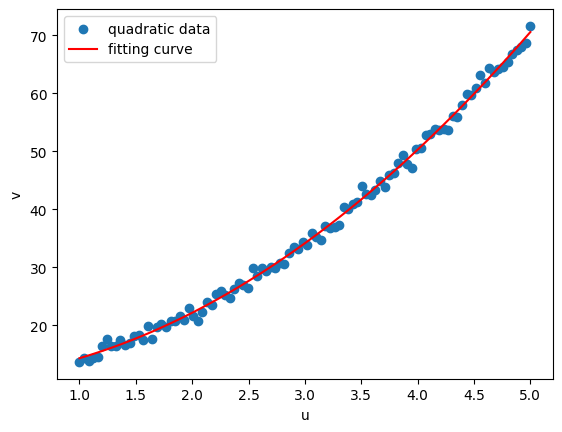

In [ ]:
plt.scatter(u, v_1, label='quadratic data')
plt.plot(u,quad_approx, label='fitting curve', color='red')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.show()

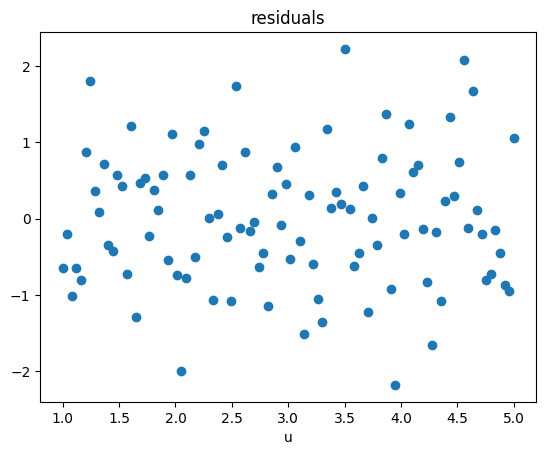

In [ ]:
diff_1 = v_1-quad_approx
plt.scatter(u,diff_1)
plt.xlabel('u')
plt.title('residuals')
plt.show()

These residuals are much lower.

Now let's do a regularized LS.

In [ ]:
n = 3

B = np.array([[2, 2, 2], [1, 2, 3]])
L = B.T @ B + .0001*np.identity(n)

x_true = np.array([[1], [2], [3]])

b_1 = L @ x_true + .01*np.random.rand(n,1)

In [ ]:
print('noisy measurement')
print(b_1)

noisy measurement
[[38.00400256]
 [52.00046962]
 [66.00453205]]


In [ ]:
xls_1 = Least_squares(L,b_1)
print(xls_1)

[[ 13.65970195]
 [-23.31770792]
 [ 15.65862896]]


In [ ]:
def Reg_least_squares(A, b, la):
  n = len(A)
  Q = A.T @ A + la*np.identity(n)
  b_prime = A.T @ b
  x_rls = LA.inv(Q) @ b_prime
  return(x_rls)

In [ ]:
x_rls = Reg_least_squares(L,b_1,.1)
print('Regularized LS =')
print(x_rls)
print()
print('Distance in approximations=', LA.norm(xls_1-x_rls))
print()
print('Distance from true solution =')
print(LA.norm(x_rls-x_true))

Regularized LS =
[[1.05325005]
 [2.00767502]
 [2.96210759]]

Distance in approximations= 31.00805227069506

Distance from true solution =
0.06580508522918795


In [ ]:
n = 200
T = 10
t = np.linspace(0,2,n)
x = np.sin(t) + t*(np.cos(t)**2)

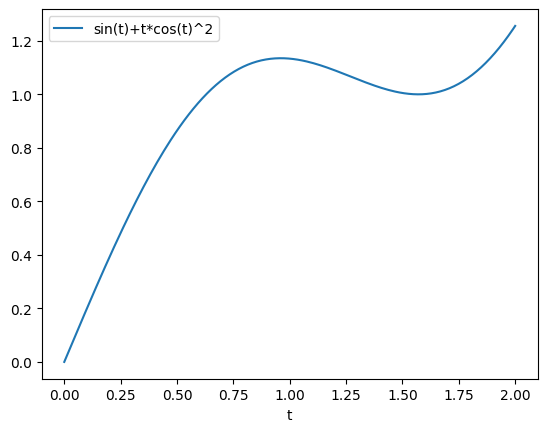

In [ ]:
plt.plot(t,x, label='sin(t)+t*cos(t)^2')
plt.xlabel('t')
plt.legend()
plt.show()

Let's scramble that up a bit.

In [ ]:
e_2 = np.random.rand(n)

b_2 = x+.1*e_2

In [ ]:
print(len(b_2))

200


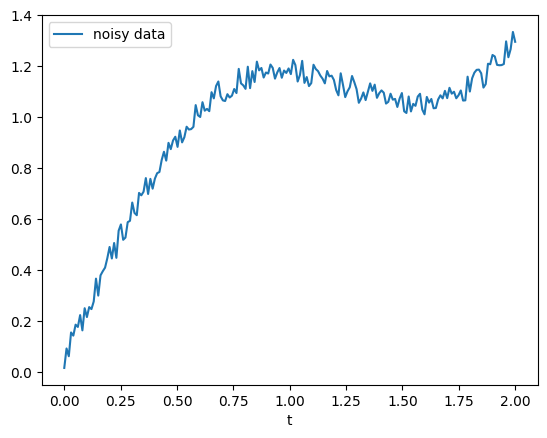

In [ ]:
plt.plot(t,b_2, label='noisy data')
plt.xlabel('t')
plt.legend()
plt.show()

In [ ]:
def Regulate(b, la):
  n = len(b)
  L = np.zeros((n-1,n))
  for i in range(n-1):
    L[i,i]=1
    L[i,i+1] = -1

  A = L.T @ L
  Q = np.identity(n) + la*A
  x_reg = LA.inv(Q) @ b
  return(x_reg)

In [ ]:
xr = Regulate(b_2, 100)

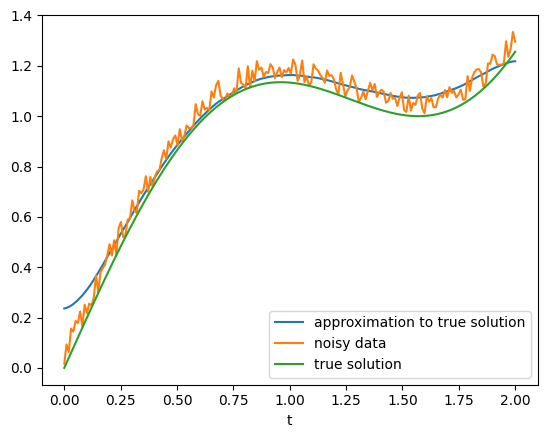

In [ ]:
plt.plot(t, xr, label = 'approximation to true solution')
plt.plot(t,b_2, label = 'noisy data')
plt.plot(t, x, label = 'true solution')
plt.xlabel('t')
plt.legend()
plt.show()

We have a curve that appears to be close to the true solution.

Now let's find a solution to Ax=b with minimum norm.

In [ ]:
def minimize_solution_norm(A, b):
  Q = A @ A.T
  x = A.T @ LA.inv(Q) @ b
  return(x)

In [ ]:
M = np.array([[1, 1, 2], [-2, 1, -1]])
b_3 = np.array([[3],[0]])

In [ ]:
x_star = minimize_solution_norm(M,b_3)
print('solution of minimal norm =')
print(x_star)
print()
print('Norm =', LA.norm(x_star))
